# Regresión lineal, polinomios. Sobreajuste

En esta clase vamos a hacer un repaso de regresión lineal, cómo se extiende a relaciones no lineales entre las variables, y qué pasa cuando nuestro modelo tiene muchos grados de libertad, del orden de la cantidad de datos que tenemos. 
Se recomienda ver el capítulo 3 y las secciones 6.2 y 7.1 del libro *An Introduction to Statistical Learning*, como así también la sección 1.1 de *Pattern Recognition and Machine Learning*, ambos recomendados como bibliografía en general para la materia y para la vida.


In [1]:
# Importamos algunas librerías generales
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

# Fijemos la semilla de numeros aleatorios para que los resultados sean reproducibles
np.random.seed(123458)

## Repaso de [regresión lineal](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression) 

Este es un breve repaso de lo que se vió la clase anterior. Lo importante acá es prestar atención a la forma en la que se llama al modelo lineal, cómo se importa de scikit-learn, cómo se ajustan los datos, dónde podemos leer los coeficientes y cómo podemos predecir nuevos valores con el modelo ajustado. La sintaxis va a ser prácticamente la misma para todos los ejemplos que siguen.

In [2]:
# Importamos modelo lineal
from sklearn.linear_model import LinearRegression

En el caso más sencillo recordemos que tenemos una variable independiente $x$ y una variable dependiente $y$, linealmente relacionadas:
$$ y \sim \beta_0 + \beta_1 x $$
La relación no es exacta debido a la presencia de ruido. Por lo tanto la igualdad la vamos a tener si escribimos dicha relación como $ y = \beta_0 + \beta_1 x + \epsilon$, donde en general suponemos que $\epsilon$ es un número aleatorio que viene de una distribución normal con $\mu = 0$ y desviación $\sigma$.


Hacemos lo mismo de la clase pasada, generar datos de una relación conocida y sumarle ruido, y ver si el modelo lineal es capaz de captar dicha relación:

In [6]:
## Creación de datos sintéticos

# Variable independiente
x = np.arange(0.00, 3.01, 0.25)

# Coeficientes de la relación lineal 
beta_0 = 1.00
beta_1 = 3.00

# Para evaluar polinomios es recomendable usar el método polyval de numpy
y = np.polyval([beta_1, beta_0], x)
y += np.random.normal(loc = 0.00, scale = 2.00, size = len(x))


In [7]:
print(x)
print(y)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.  ]
[-0.16362826 -0.79021635  2.45087553  2.87002914  5.10765954  4.11100505
  5.90484719  5.12481477  9.57301377  9.49178207 10.7889349   9.00206895
 12.0784147 ]


En el siguiente bloque, creamos y ajustamos el modelo:

In [8]:
## Ajuste del modelo 

# Creación del modelo lineal (ver parámetros en la documentación)
reg = LinearRegression()

# Este cambio de dimensiones es necesario ya que scikit-learn espera que x sea una matriz
X = x.reshape(-1, 1)

# Ajuste del modelo 
reg.fit(X, y)

# Coeficientes del modelo 
beta_0_estimado = reg.intercept_
beta_1_estimado = reg.coef_[0]

print('Ordenada al origen = {:.3f}'.format(beta_0_estimado))
print('Pendiente = {:.3f}'.format(beta_1_estimado))

Ordenada al origen = -0.306
Pendiente = 4.079


In [9]:
print(reg.coef_)

[4.07858679]


#### Calidad del ajuste
Esta se mide mediante el coeficiente:
$$ R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} $$
donde $\text{TSS} = \sum_i({y_i - \bar y})^2$ es la suma total de los cuadrados ($\bar y$ es la media muestral o promedio de $y$) y 
$\text{RSS} = \sum_i({y_i - \hat y_i})^2$, donde $\hat y_i$ es el valor estimado de $y_i$. Un $R^2 \sim 1$ indica un buen ajuste de los datos.

In [10]:
#Calidad del ajuste
print('Calidad del ajuste R^2 = {:.3f}'.format(reg.score(X,y)))

Calidad del ajuste R^2 = 0.923


Es un buen ajuste de los datos, se asemeja bastante a 1

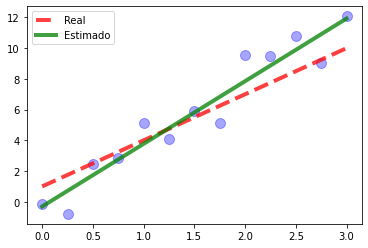

In [11]:
# Gráficos

fig, ax = plt.subplots(1, 1, figsize = (6, 4))

# Puntos de entrenamiento
ax.scatter(x, y, color = 'b', alpha = 0.35, s = 100)

# Relación real
y_verdadero = np.polyval([beta_1, beta_0], x)
ax.plot(x, y_verdadero, color = 'r', linestyle = '--', linewidth = 4, alpha = 0.75)

# Relación estimada
y_estimado = np.polyval([beta_1_estimado, beta_0_estimado], x)
ax.plot(x, y_estimado, color = 'g', linestyle = '-', linewidth = 4, alpha = 0.75)

ax.legend(['Real', 'Estimado'])
plt.show()


Con el modelo ajustado podemos predecir nuevos valores de la variable $y$ a partir de nuevos valores de la variable independiente $x$

In [13]:
### Predicción de nuevos valores
x_nuevos = np.array([3.42, 0.65, 11.1])
print(reg.predict(x_nuevos.reshape(-1, 1)))

[13.6423944   2.344709   44.96594091]


## [Regresión polinómica](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)

La idea de la regresión polinómica es la de aprovechar toda la maquinaria del modelo lineal para describir no linealidades en los datos. La clave está es que un modelo del tipo:
$$ y \sim \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_m x_m$$
es lineal respecto de los parámetros, independientemente de quiénes sean las $x$'s (siempre y cuando cumplan las hipótesis presentadas en la clase anterior).

Por lo tanto, podemos tomar que $x_1 \equiv x$, $x_2 \equiv x^2$, ..., $x_m \equiv x^m$, y lo que obtenemos es una relación no lineal entre $y$ y $x$: 
  $$ y \sim \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_m x^m$$
y utilizar cuadrados mínimos para estimar los valores de los coeficientes (encontrar los $\hat \beta_j$).

#### Datos sintéticos y ajuste del modelo 

Para ganar un poco de *feeling* respecto a la regresión polinómica vamos a generar datos sintéticos a partir de una relación que conozcamos. 
Esto nos permite jugar un poco y ver cómo funciona el ajuste con los datos. 

Por supuesto, en un problema real nunca conoceremos cómo fueron generados los datos y la idea del ajuste es estimarla. Para estimar la relación real entre los datos vamos a tener que tomar algunas decisiones, como por ejemplo, qué variables son buenas para explicar a la variable dependiente y hasta qué grado incluímos estas variables si consideramos que la relación tiene que ser polinómica. Algunas cosas exploramos acá y otras en el transcurso de la materia.


Empezamos con la generación de datos sintéticos. En este caso vamoa a generar una reacion de la forma $y$ = $a * sin(\pi x) + b$ 

(-1.05, 1.05)

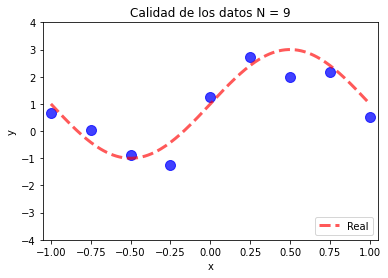

In [16]:
## creación de datos sintéticos

#variable independiente

x = np.arange(-1.00, 1.01, 0.25)

# Para generar una relación cúbica usamos la función polyval y  le agremaos ruido normal
a = 2.00
b = 1.00

y = a * np.sin(np.pi * x) + b
y += np.random.normal(loc = 0.00, scale = 0.50, size = len(x))

# Creemos un dataframe para reutilizar estos mismo datos más adelante
df_sintetico = pd.DataFrame()
df_sintetico['x'] = x
df_sintetico['y'] = y

# Gráfico de los datos
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
df_sintetico.plot(ax = ax, x = 'x', y = 'y', kind = 'scatter', s = 100, color = 'b', alpha = 0.75)
ax.set_title('Calidad de los datos N = {}'.format(df_sintetico.shape[0]))

# Reación real
x_aux = np.arange(-1.00, 1.01, 0.01)
ax.plot(x_aux, a * np.sin(np.pi * x_aux) + b, '--', color = 'r', linewidth = 3, alpha = 0.65)

ax.legend(['Real'], loc = 4)

ax.set_ylim([-4.00, 4.00])
ax.set_xlim([-1.05, 1.05])

In [ ]:
#